In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [17]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [33]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [34]:
df['target'] = iris.target

In [35]:
# df['target'] = df['target'].apply(lambda x: iris.target_names[x])

In [36]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
x = df.drop('target',axis=1)

In [38]:
y = df['target']

In [47]:
df.target.unique()

array([0, 1, 2])

In [52]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [53]:
df1 = df.iloc[0:5]
df2 = df[50:55]
df3 = df[100:105]

In [54]:
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [60]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
## sepal length vs sepal width

Text(0, 0.5, 'sepal width')

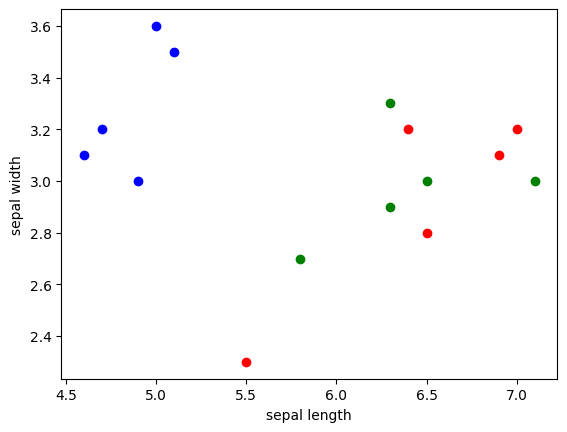

In [58]:
plt.scatter(df1['sepal length (cm)'],df1["sepal width (cm)"],color='blue')
plt.scatter(df2['sepal length (cm)'],df2["sepal width (cm)"],color='red')
plt.scatter(df3['sepal length (cm)'],df3["sepal width (cm)"],color='green')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [64]:
x_test.shape

(30, 4)

## create KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [69]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [70]:
knn.score(x_test,y_test)

0.9666666666666667

In [71]:
predict = knn.predict(x_test)

In [74]:
accuracy_score(predict,y_test)

0.9666666666666667

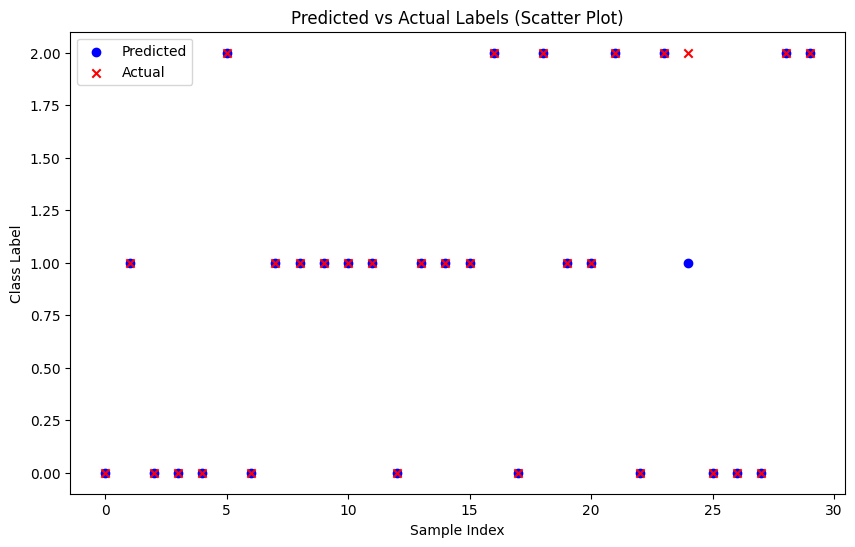

In [79]:
plt.figure(figsize=(10,6))

# Scatter plot for predicted values
plt.scatter(range(len(predict)), predict, label='Predicted', color='blue', marker='o')

# Scatter plot for actual values
plt.scatter(range(len(y_test)), y_test, label='Actual', color='red', marker='x')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Predicted vs Actual Labels (Scatter Plot)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [89]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(predict,y_test)

In [83]:
cm

array([[11,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  7]], dtype=int64)

In [84]:
import seaborn as sns

Text(58.222222222222214, 0.5, 'Truth')

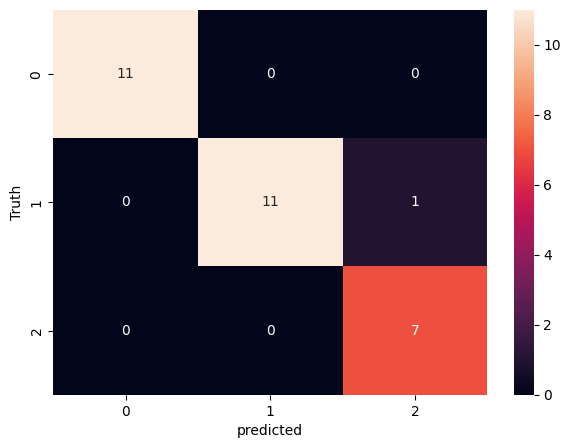

In [87]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [91]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

